In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

In [3]:
from sklearn.datasets import fetch_olivetti_faces

In [4]:
ovf = fetch_olivetti_faces()

In [5]:
df = pd.DataFrame(ovf.data)
actual = pd.DataFrame(ovf.target, columns=['results'])

In [6]:
df.shape

(400, 4096)

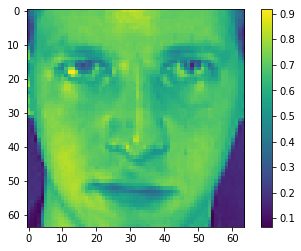

In [7]:
plt.figure()
plt.imshow(ovf.images[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [8]:
from sklearn.model_selection import train_test_split
y = actual['results'].ravel()

In [9]:
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2, random_state=0)

In [10]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver='lbfgs', multi_class='auto', max_iter = 10000)

In [11]:
lr.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [26]:
lr_predict = lr.predict(X_test)

In [27]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score

In [28]:
confusion_matrix(y_test, lr_predict)

array([[4, 0, 0, ..., 0, 0, 0],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [31]:
print(lr.score(X_test, y_test))
print(precision_score(y_test, lr_predict, average='macro'))
print(recall_score(y_test, lr_predict, average='macro'))
print(f1_score(y_test, lr_predict, average='macro'))

0.9625
0.9481481481481482
0.9574074074074075
0.9518518518518518


C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [17]:
#print(cross_val_score(lr, df, y, cv=5))
#print(np.mean(cross_val_score(lr, df, y, cv=5)))
scores = cross_validate(lr, df, y, cv=5, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
print(scores['test_accuracy'])
print(np.mean(scores['test_accuracy']))
print(scores['test_precision_macro'])
print(np.mean(scores['test_precision_macro']))
print(scores['test_recall_macro'])
print(np.mean(scores['test_recall_macro']))
print(scores['test_f1_macro'])
print(np.mean(scores['test_f1_macro']))

[1.     0.95   0.975  0.9875 0.95  ]
0.9724999999999999
[1.     0.95   0.975  0.9875 0.95  ]
0.9724999999999999
[1.         0.95416667 0.98333333 0.99166667 0.94583333]
0.975
[1.     0.95   0.975  0.9875 0.95  ]
0.9724999999999999
[1.         0.945      0.97333333 0.98666667 0.94416667]
0.9698333333333332


In [33]:
from sklearn.svm import SVC

In [34]:
model = SVC(gamma='scale')

In [35]:
model.fit(X_train, y_train)
predict = model.predict(X_test)

In [36]:
confusion_matrix(y_test, predict)

array([[2, 0, 0, ..., 0, 0, 1],
       [0, 4, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 1],
       ...,
       [0, 0, 0, ..., 2, 0, 0],
       [0, 0, 0, ..., 0, 2, 0],
       [0, 0, 0, ..., 0, 0, 1]], dtype=int64)

In [37]:
print(model.score(X_test, y_test))
print(precision_score(y_test, predict, average='macro'))
print(recall_score(y_test, predict, average='macro'))
print(f1_score(y_test, predict, average='macro'))

0.825
0.8951719576719577
0.8999999999999999
0.8647486772486772


C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [38]:
#print(cross_val_score(model, df, y, cv=5))
#print(np.mean(cross_val_score(model, df, y, cv=5)))
scores = cross_validate(model, df, y, cv=5, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
print(scores['test_accuracy'])
print(np.mean(scores['test_accuracy']))
print(scores['test_precision_macro'])
print(np.mean(scores['test_precision_macro']))
print(scores['test_recall_macro'])
print(np.mean(scores['test_recall_macro']))
print(scores['test_f1_macro'])
print(np.mean(scores['test_f1_macro']))

C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.9875 0.95   0.95   0.9375 0.8875]
0.9425000000000001
[0.99166667 0.95416667 0.96666667 0.9725     0.88083333]
0.9531666666666666
[0.9875 0.95   0.95   0.9375 0.8875]
0.9425000000000001
[0.98666667 0.945      0.94916667 0.93928571 0.87428571]
0.9388809523809524


C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [40]:
y = pd.DataFrame(ovf.target, columns=['results'])
y.head()

,results
0,0
1,0
2,0
3,0
4,0


In [41]:
df.isna().sum()

0       0
1       0
2       0
3       0
4       0
5       0
6       0
7       0
8       0
9       0
10      0
11      0
12      0
13      0
14      0
15      0
16      0
17      0
18      0
19      0
20      0
21      0
22      0
23      0
24      0
25      0
26      0
27      0
28      0
29      0
       ..
4066    0
4067    0
4068    0
4069    0
4070    0
4071    0
4072    0
4073    0
4074    0
4075    0
4076    0
4077    0
4078    0
4079    0
4080    0
4081    0
4082    0
4083    0
4084    0
4085    0
4086    0
4087    0
4088    0
4089    0
4090    0
4091    0
4092    0
4093    0
4094    0
4095    0
Length: 4096, dtype: int64

In [42]:
data = df.copy()
data['results'] = actual.copy()['results'] # combining input and output into one table
train_data = data.sample(frac=0.8, random_state=0)
test_data = data.drop(train_data.index)

In [43]:
train_labels = train_data.copy()['results']
test_labels = test_data.copy()['results']

In [44]:
train_data = train_data.drop('results', axis=1)
test_data = test_data.drop('results', axis=1)

In [45]:
train_data.shape

(320, 4096)

In [46]:
train_labels

132    13
309    30
341    34
196    19
246    24
60      6
155    15
261    26
141    14
214    21
37      3
134    13
113    11
348    34
12      1
59      5
293    29
140    14
206    20
199    19
176    17
268    26
124    12
344    34
175    17
313    31
78      7
15      1
286    28
102    10
       ..
331    33
123    12
222    22
62      6
302    30
130    13
187    18
23      2
43      4
0       0
201    20
339    33
98      9
387    38
178    17
256    25
94      9
369    36
95      9
351    35
169    16
69      6
305    30
48      4
207    20
279    27
227    22
148    14
143    14
180    18
Name: results, Length: 320, dtype: int32

In [116]:
def build_model():
    model = keras.Sequential([
        layers.Dense(256, activation='relu', input_shape=[len(train_data.keys())]),
        #layers.Dense(4, activation='tanh'),
        #layers.Dense(1024, activation='relu'),
        layers.Dense(40, activation='softmax')
    ])
    
    model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])
    return model

In [117]:
nn_model = build_model()

In [118]:
nn_model.summary()

Model: "sequential_33"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_66 (Dense)             (None, 256)               1048832   
_________________________________________________________________
dense_67 (Dense)             (None, 40)                10280     
Total params: 1,059,112
Trainable params: 1,059,112
Non-trainable params: 0
_________________________________________________________________


In [119]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0: print('')
        print('.', end='')

EPOCHS = 1000

history = nn_model.fit(
    #norm_train_data, train_labels,
    train_data, train_labels,
    epochs=EPOCHS, validation_split=0.2, verbose=0,
    callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
..........................................................................................

In [120]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,accuracy,val_loss,val_accuracy,epoch
995,0.000139,1.0,0.337813,0.921875,995
996,0.000138,1.0,0.338530,0.921875,996
997,0.000138,1.0,0.338612,0.921875,997
998,0.000137,1.0,0.338533,0.921875,998
999,0.000137,1.0,0.337816,0.921875,999


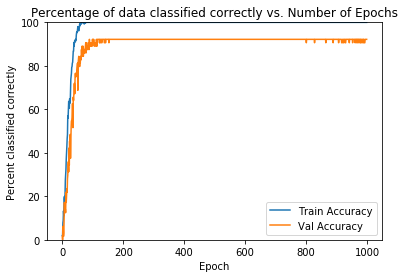

In [121]:
def plot_history(history):
    hist = pd.DataFrame(history.history)
    hist['epoch'] = history.epoch
    
    plt.figure()
    plt.title('Percentage of data classified correctly vs. Number of Epochs')
    plt.xlabel('Epoch')
    plt.ylabel('Percent classified correctly')
    plt.plot(hist['epoch'], hist['accuracy']*100,
            label='Train Accuracy')
    plt.plot(hist['epoch'], hist['val_accuracy']*100,
            label='Val Accuracy')
    plt.ylim([0,100])
    plt.legend()
    
plot_history(history)  

In [122]:
predictions = nn_model.predict(test_data)

In [123]:
i = 0
tl = np.array(test_labels)
num_rows, num_cols = predictions.shape
from decimal import getcontext, Decimal
getcontext().prec = 3
correct = 0
while i < num_rows:
  msg = "\033[1;31;40m WRONG! \033[0m"
  if(tl[i] == np.argmax(predictions[i])):
        msg = "\033[1;32;40m CORRECT! \033[0m"
        correct = correct + 1
  print(str(i) + ': Predicted ' + str(np.argmax(predictions[i])) + ' with likelihood ' 
        + "{0:.2f}".format(np.max(predictions[i]) * 100) +
       '%. Expected ' + str(tl[i]) + '. ' + msg) 
  i = i + 1
print(str(correct) + "/" + str(i) + " correct total. " + str(100.0 * float(correct/i)) + "%")

0: Predicted 37 with likelihood 87.23%. Expected 0.  WRONG! 
1: Predicted 2 with likelihood 84.86%. Expected 2.  CORRECT! 
2: Predicted 2 with likelihood 98.39%. Expected 2.  CORRECT! 
3: Predicted 3 with likelihood 98.30%. Expected 3.  CORRECT! 
4: Predicted 3 with likelihood 90.93%. Expected 3.  CORRECT! 
5: Predicted 3 with likelihood 99.78%. Expected 3.  CORRECT! 
6: Predicted 3 with likelihood 57.85%. Expected 3.  CORRECT! 
7: Predicted 4 with likelihood 95.84%. Expected 4.  CORRECT! 
8: Predicted 4 with likelihood 90.44%. Expected 4.  CORRECT! 
9: Predicted 5 with likelihood 99.99%. Expected 5.  CORRECT! 
10: Predicted 5 with likelihood 99.82%. Expected 5.  CORRECT! 
11: Predicted 7 with likelihood 99.33%. Expected 7.  CORRECT! 
12: Predicted 7 with likelihood 99.40%. Expected 7.  CORRECT! 
13: Predicted 8 with likelihood 99.81%. Expected 8.  CORRECT! 
14: Predicted 8 with likelihood 99.92%. Expected 8.  CORRECT! 
15: Predicted 8 with likelihood 99.41%. Expected 8.  CORRECT! 
16:

In [126]:
datax = data.sample(frac=1) # need to randomize order of data
actualx = datax['results']
datax = datax.drop('results', axis=1)
from tensorflow.keras.wrappers.scikit_learn import KerasClassifier
nn_wrapper = KerasClassifier(build_fn=build_model, 
                                 epochs=EPOCHS,  
                                 verbose=0)
#nn_score = cross_val_score(nn_wrapper, datax, actualx, cv=5)
#print(nn_score)
#print(np.mean(nn_score))
nn_score = cross_validate(nn_wrapper, datax, actualx, cv=5, scoring=('accuracy', 'precision_macro', 'recall_macro', 'f1_macro'))
print(nn_score['test_accuracy'])
print(np.mean(nn_score['test_accuracy']))
print(nn_score['test_precision_macro'])
print(np.mean(nn_score['test_precision_macro']))
print(nn_score['test_recall_macro'])
print(np.mean(nn_score['test_recall_macro']))
print(nn_score['test_f1_macro'])
print(np.mean(nn_score['test_f1_macro']))

C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)
C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no true samples.
  'recall', 'true', average, warn_for)


C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\AdamK\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


[0.9375 0.9875 0.975  0.9625 0.9   ]
0.9525
[0.93055556 0.98648649 0.9875     0.94144144 0.90714286]
0.950625268125268
[0.92361111 0.99459459 0.98611111 0.94594595 0.91904762]
0.9538620763620764
[0.91362434 0.98798799 0.98368607 0.93963964 0.90081633]
0.9451508719603957
